In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib as mpl



In [4]:
tsnedir = "../dataset/whole_mp_xy/tsne"
onlyfiles = [join(tsnedir, f) for f in listdir(tsnedir) if isfile(join(tsnedir, f))]
allmp_id = pd.read_csv("./all_mp_all_props.csv").mp_id.to_frame()

/tmp/ipykernel_374738/3694385310.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  allmp_id = pd.read_csv("./all_mp_all_props.csv").mp_id.to_frame()


In [17]:
features={}
for file in onlyfiles:
    decriptor = file.split('/')[-1].split('_')[0]
    print(decriptor)
    allmp_feat   = np.load(file)


    feat_xy = pd.DataFrame(allmp_feat.tolist())
    feat_xy.columns =['x','y']
    feat_xy['mp_id'] = allmp_id
    features[decriptor]=feat_xy
    




gatgnn
Ccod0
xrd
topo
comp
pwdm100
Fcod0
pwdm100rad


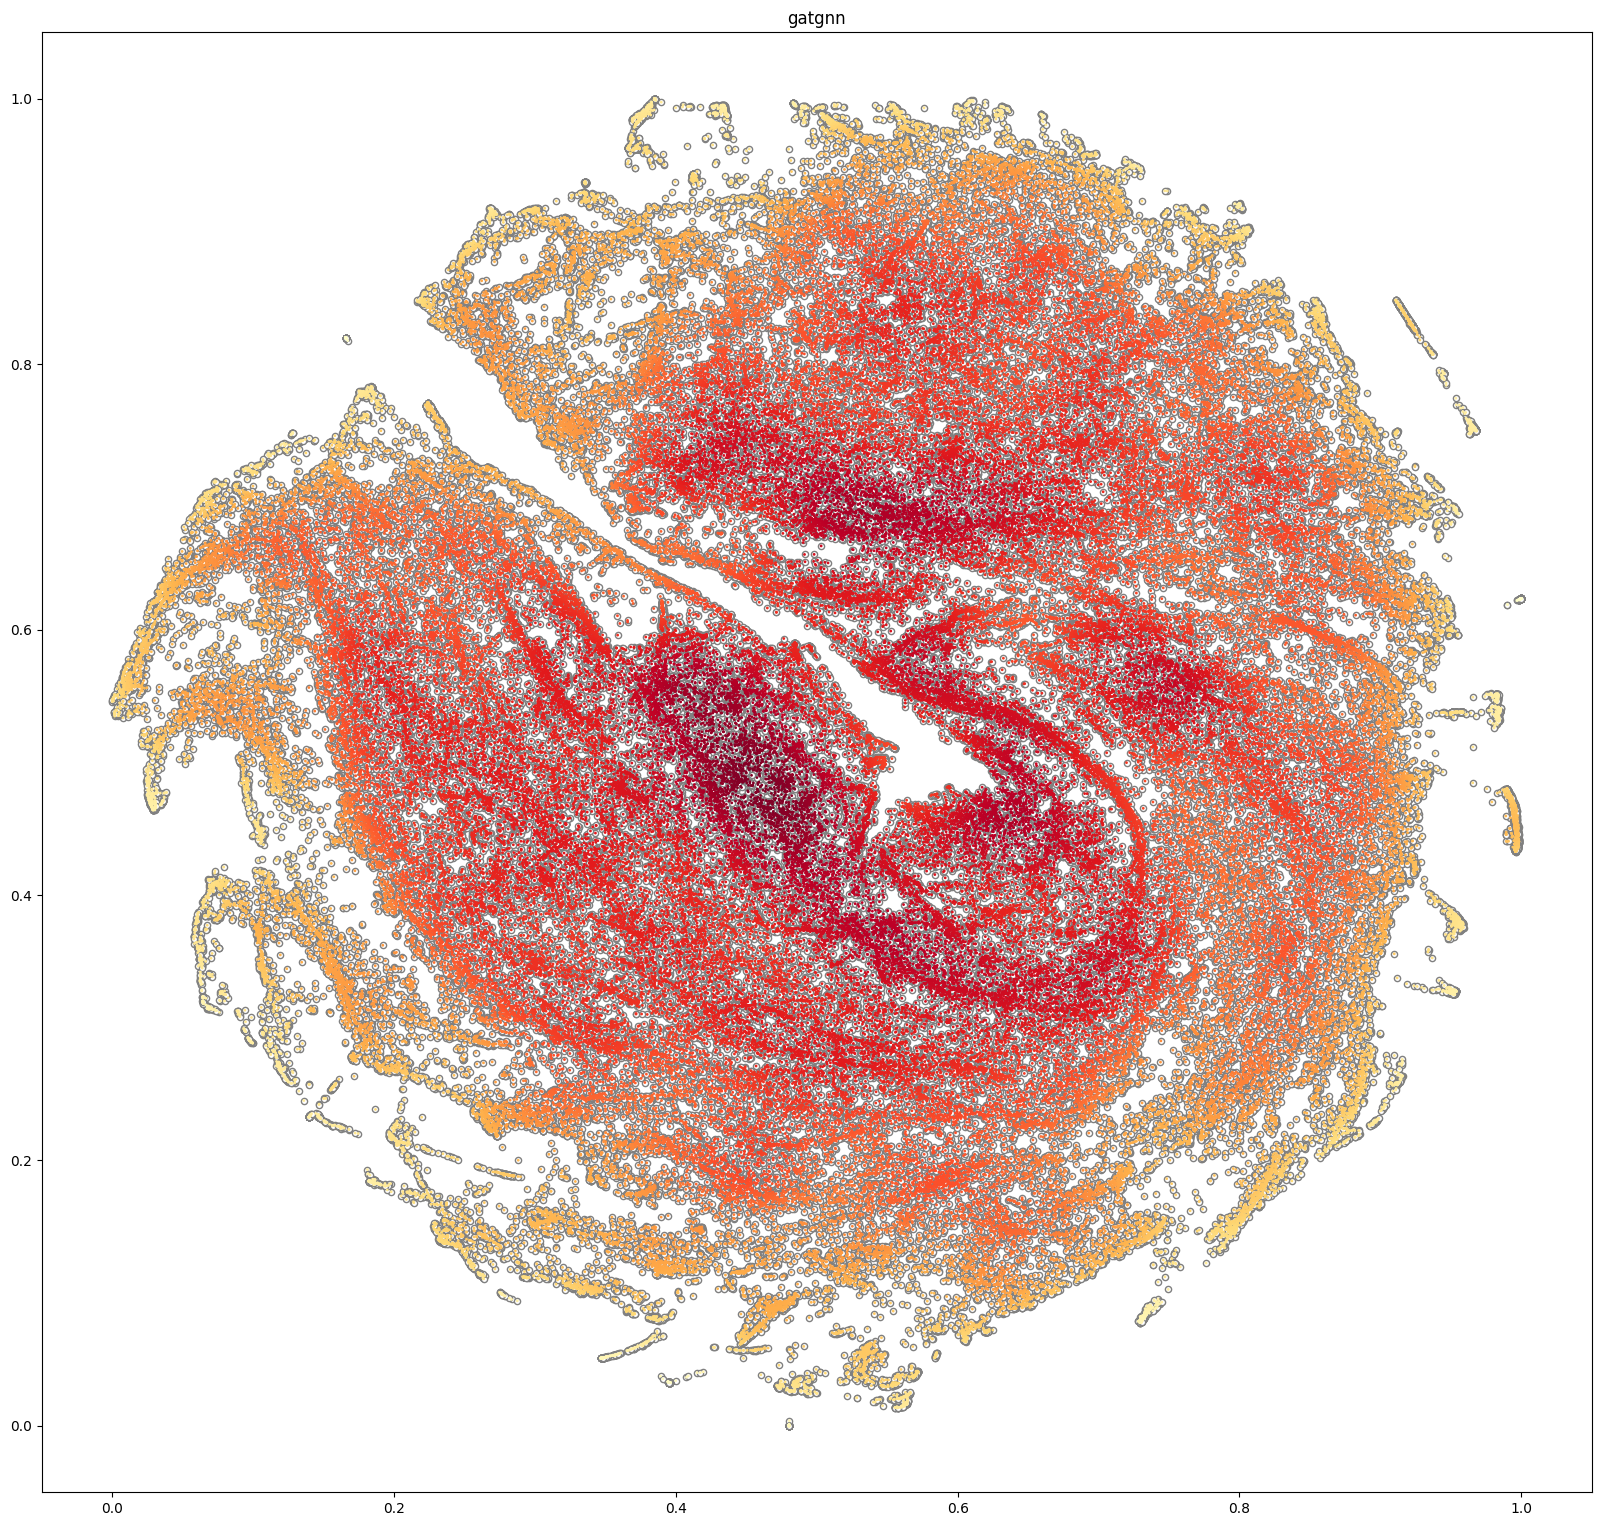

In [18]:
#each graph can take up to 5 mins
for decriptor in features:
    feat_xy = features[decriptor]
    fig = plt.figure(figsize=(20,20),dpi=100)
    ax1 = fig.add_subplot(111)

    x=feat_xy.loc[:]['x']
    y=feat_xy.loc[:]['y']
    plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=1,zorder=3,cmap=mpl.colormaps['YlOrRd'])
    plt.title(decriptor)
    plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                    wspace=0.1, hspace=0.15)
    plt.xticks()
    plt.show()
    break